## 1. Implementati si trasati caracteristicile in frecventa ale ferestrelor prezentate in laboratorul anterior.

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

def replace_zeroes(data):
    min_nonzero = np.min(data[np.nonzero(data)])
    data[data == 0] = min_nonzero
    return data

def wrapper(function, windowSize):
    return [function(i) if i < windowSize else 0 for i in range(windowSize)]

def plot_graphs(function=None, window_size=20, functions=None, signal=None, signal_name=None, signals=None, signal_names=None):
    if function is not None and window_size is not None:
        signals = [function(window_size)]
        s_names = [function.__name__.capitalize().replace('_', ' ')]
    elif functions is not None and window_size is not None:
        signals = [function(window_size) for function in functions]
        s_names = [function.__name__.capitalize().replace('_', ' ') for function in functions]
    elif signal is not None and signal_name is not None:
        signals = [signal]
        s_names = [signal_name]
    elif signals is not None and signal_names is not None:
        s_names = signal_names
    else:
        return None
    
    window_size = 1 if window_size == None else window_size
    
    nfft = 256
    title = ', '.join(s_names)
    fig, ax = plt.subplots(3, 1, figsize=(8, 14))
    ax[0].set_title(f'{title}')
    fig.subplots_adjust(hspace=0.2)
    
    for i, signal in enumerate(signals):            
        X = fft(signal, nfft) / window_size
        amp = np.abs(X[:nfft//2])
        mag = 20 * np.log10(replace_zeroes((amp / amp.max())))
        freq = fftfreq(nfft)[:nfft//2]
        
        ax[0].set_ylabel("Amplitude")
        ax[0].set_xlabel("Time")
        ax[0].plot(signal)

        ax[1].set_ylabel("Linear-scale Magnitude")
        ax[1].set_xlabel("Frequency")
        ax[1].plot(freq, amp, label=s_names[i])

        ax[2].set_ylabel("Logarithmic-scale Magnitude")
        ax[2].set_xlabel("Frequency")
        ax[2].plot(freq, mag)
        if(len(signals) > 1):
            ax[1].legend()


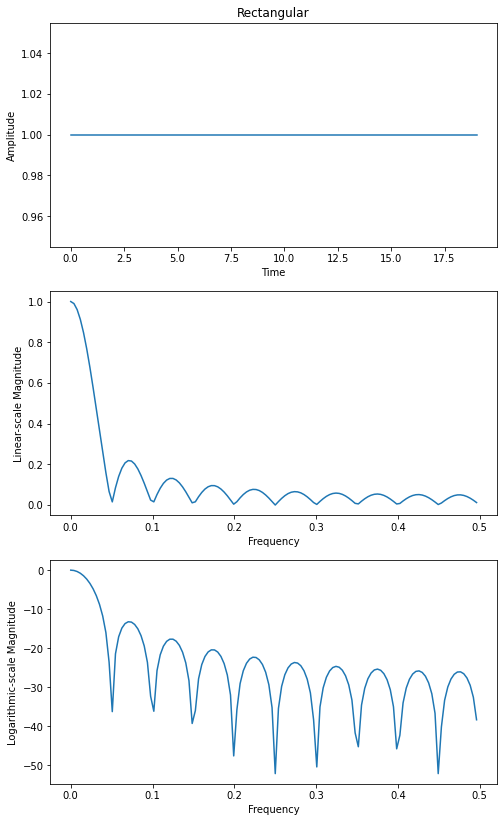

In [28]:
def rectangular(window_size):
    return wrapper(lambda x: 1, window_size)

plot_graphs(function=rectangular, window_size=20)

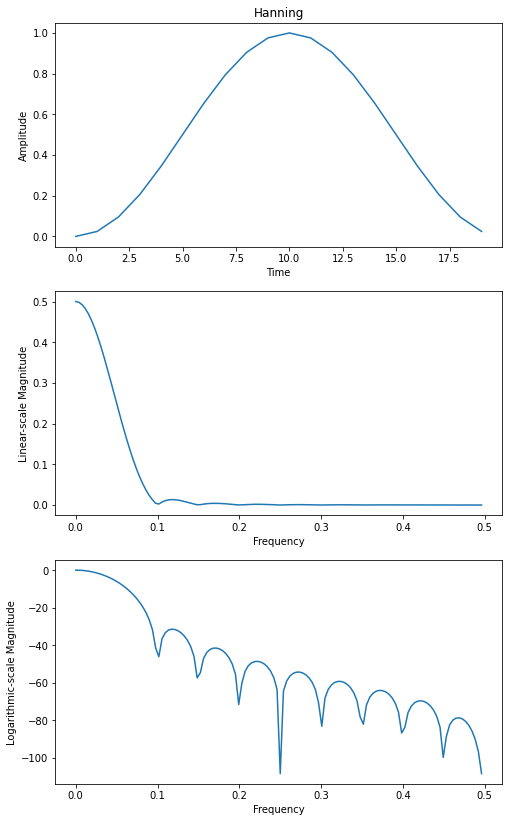

In [29]:
def hanning(window_size):
    return wrapper(lambda x: 0.5 * (1 - np.cos(2 * np.pi * x / window_size)), window_size)

plot_graphs(function=hanning, window_size=20)

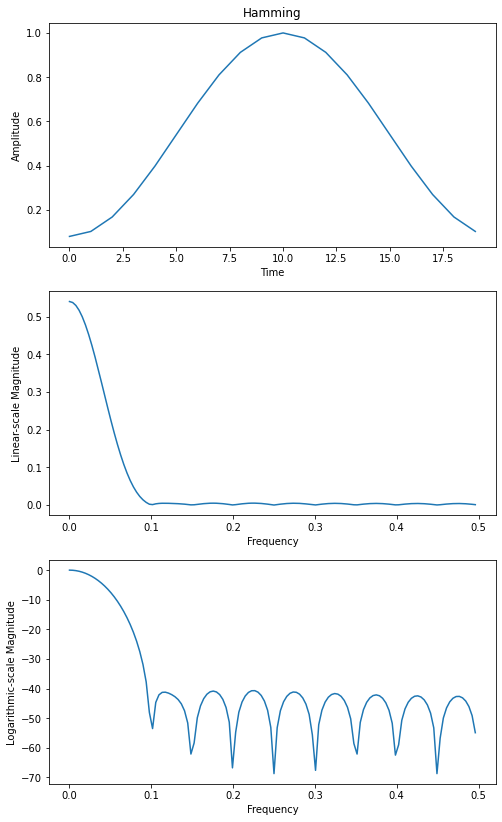

In [30]:
def hamming(window_size):
    return wrapper(lambda x: 0.54 - 0.46 * np.cos(2 * np.pi * x / window_size), window_size)

plot_graphs(function=hamming, window_size=20)

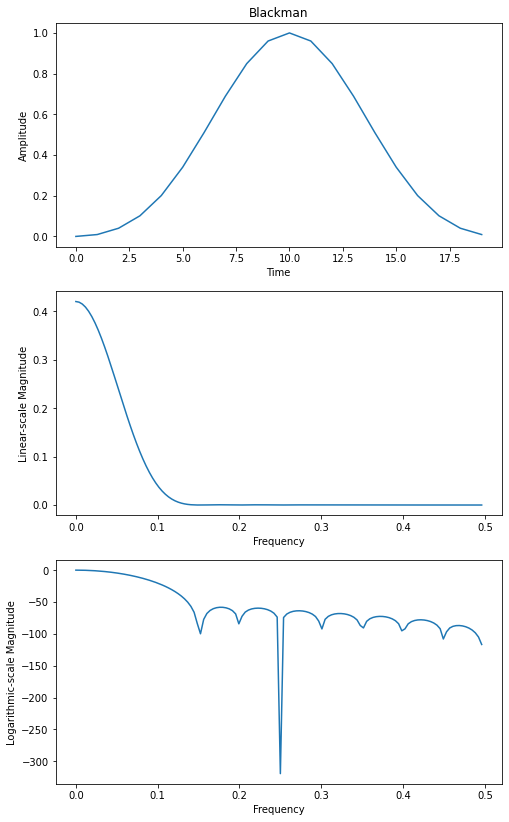

In [31]:
def blackman(window_size):
    return wrapper(lambda x: (0.42 - 0.5 * np.cos(2 * np.pi * x / window_size) + 0.08 * np.cos(4 * np.pi * x / window_size)), window_size)

plot_graphs(function=blackman, window_size=20)

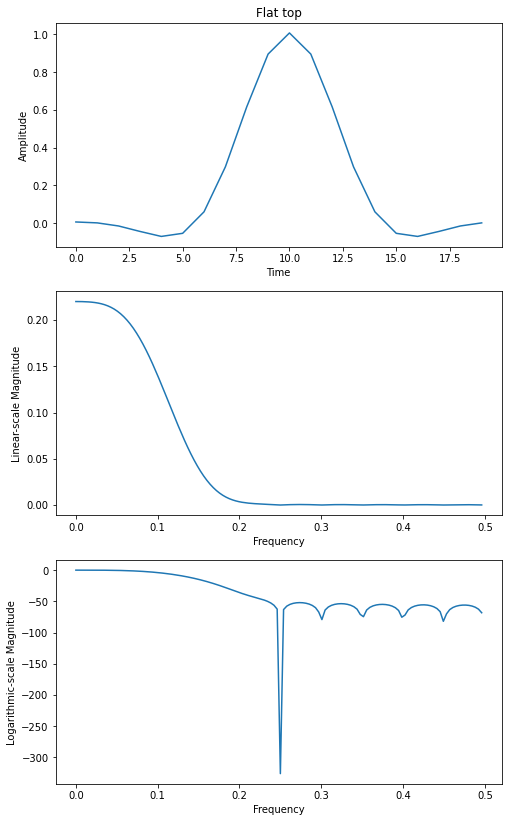

In [32]:
def flat_top(windowSize):
    return wrapper(lambda x: (0.22 - 0.42 * np.cos(2 * np.pi * x / windowSize) + 0.28 * np.cos(4 * np.pi * x / windowSize) - 0.08 * np.cos(6 * np.pi * x / windowSize)) + 0.007 * np.cos(8 * np.pi * x / windowSize), windowSize)

plot_graphs(function=flat_top, window_size=20)

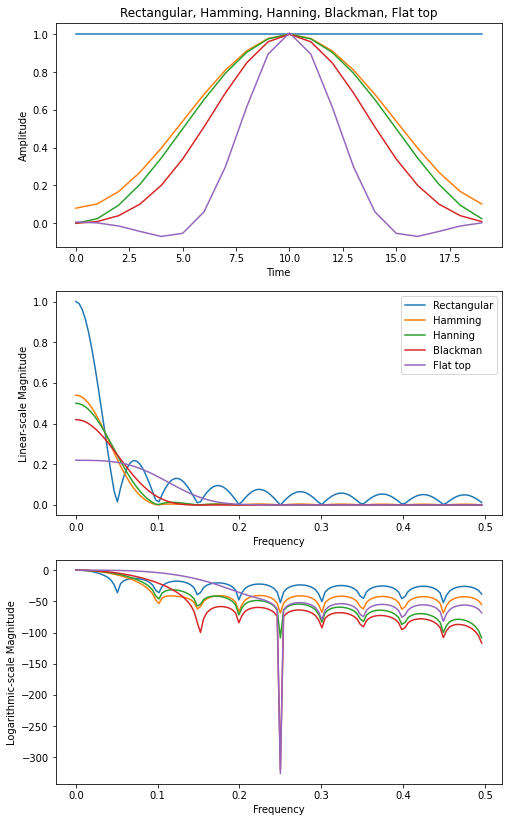

In [164]:
plot_graphs(functions=[rectangular, hamming, hanning, blackman, flat_top], window_size=20)

## 2. Incarcati fisierul trafic.csv, ce contine date de trafic esantionate la o ora.
### (a) Calculati DFT si afisati componentele de frecventa.

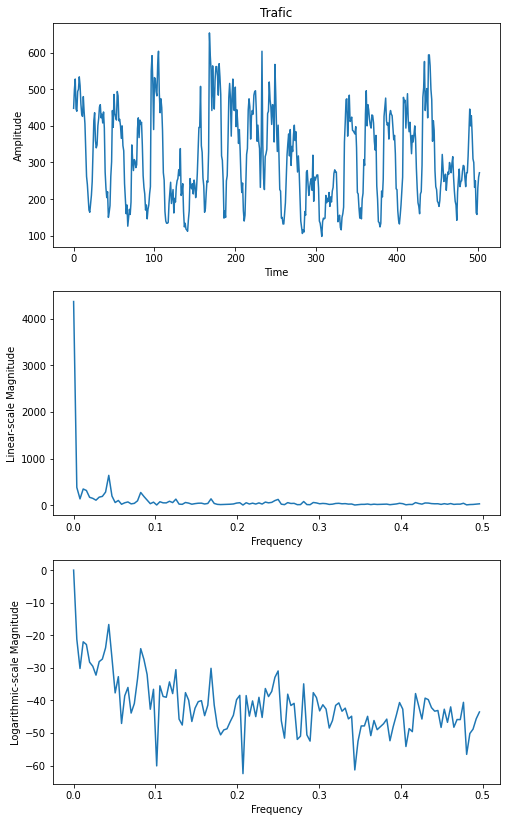

In [165]:
import csv
import numpy as np

data = []
with open("trafic.csv", newline='') as f:
    reader = csv.reader(f)
    for x in reader:
        if x[0].isnumeric():
            data.append(int(x[0]))
    
data = np.array(data)
plot_graphs(signal=data, signal_name='Trafic')

### (b) Dorind sa filtrati zgomotul (frecvente inalte), alegeti o frecventa de taiere pentru un filtru trece-jos pe care il veti crea in continuare. Argumentati. Care este valoarea frecventei in Hz si care este valoarea frecventei normalizate intre 0 si 1, unde 1 reprezinta frecventa Nyquist?

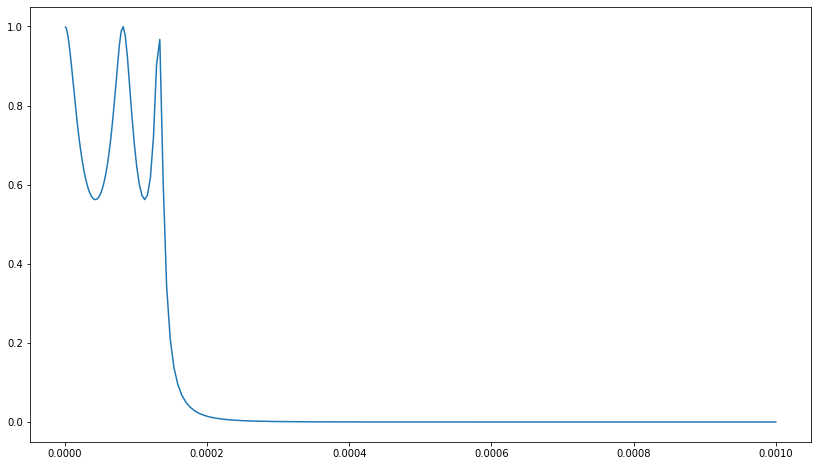

In [640]:
# Filtrul Chebyshev e preferabil pentru filtrarea zgomotului
fs = 1 / 3600
nyquist = fs / 2
Wn = nyquist

b, a = cheby1(5, 5, Wn, 'low', analog=True)
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
w, h = freqs(b, a, plot=lambda w, h: ax.plot(w, abs(h)))
aux = np.abs(h)[::-1]
Wn = len(aux) - np.where(aux > 0.5)[0][0] # 133 in rad/s => 21 Hz
Wn = w[Wn] / w.max() # 0.15 dupa normalizare

### (c) Utilizand functiile si scipy.signal.butter si scipy.signal.cheby1 proiectati filtrele Butterworth si Chebyshev de ordin 5, cu frecventa de taiere Wn stabilita mai sus. Pentru inceput setati atenuarea ondulatiilor, rp = 5 DB, urmand ca apoi sa incercati si alte valori.


In [641]:
from scipy.signal import butter, cheby1, freqs, filtfilt
cheby_b, cheby_a = cheby1(5, 5, Wn, 'low')
butter_b, butter_a = butter(5, Wn)

### (d) Folositi functia scipy.signal.freqz pentru a calcula raspunsul in frecventa al filtrelor si afisati-l grafic.

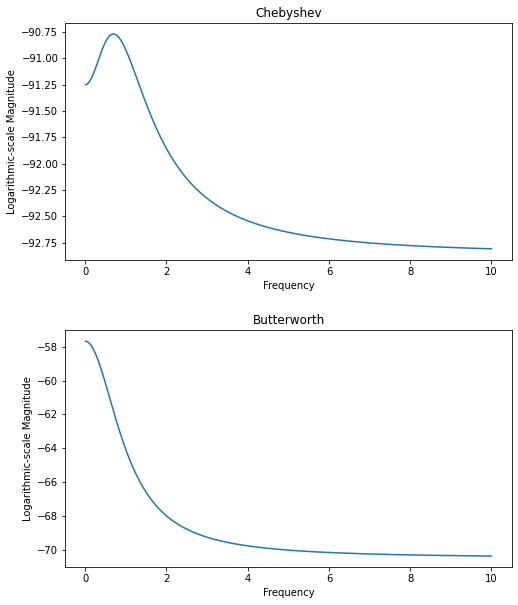

In [642]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.subplots_adjust(hspace=0.3)
ax[0].set_title('Chebyshev')
ax[0].set_ylabel('Logarithmic-scale Magnitude')
ax[0].set_xlabel('Frequency')
ax[1].set_title('Butterworth')
ax[1].set_ylabel('Logarithmic-scale Magnitude')
ax[1].set_xlabel('Frequency')

cheby_w, cheby_h = freqs(cheby_b, cheby_a, plot=lambda w, h: ax[0].plot(w, 20 * np.log10(abs(h))))
butter_w, butter_h = freqs(butter_b, butter_a, plot=lambda w, h: ax[1].plot(w, 20 * np.log10(abs(h))))

### (e) Filtrati datele de trafic cu cele 2 filtre si afisati semnalele filtrate impreuna cu datele brute. Ce filtru alegeti din cele 2 si de ce?

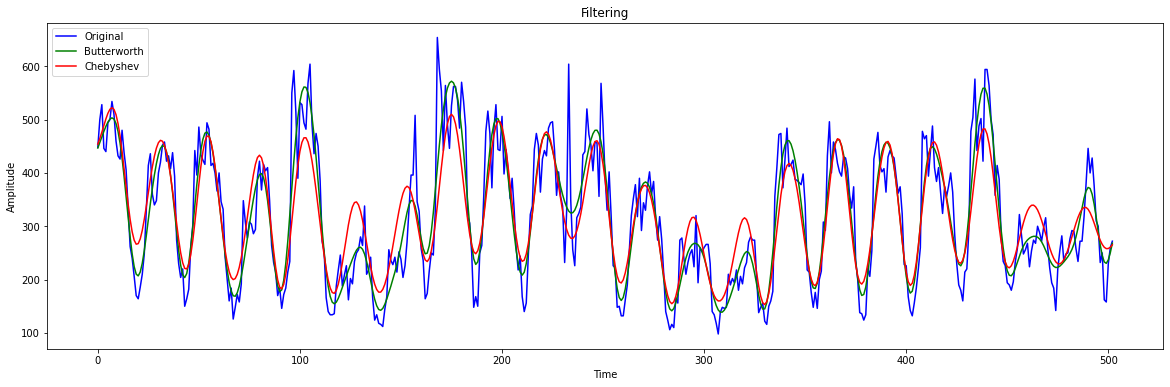

In [643]:
def compare_signals(signals, labels, colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white'], title=None):
    plt.rcParams["figure.figsize"] = (20, 6)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    for signal, label, color in zip(signals, labels, colors):
        plt.plot(signal, label=label, color=color)
    plt.legend(loc='upper left')
    plt.show()

cheby_filtered = filtfilt(b=cheby_b, a=cheby_a, x=data)
butter_filtered = filtfilt(b=butter_b, a=butter_a, x=data)
compare_signals(signals=[data, butter_filtered, cheby_filtered], labels=['Original', 'Butterworth', 'Chebyshev'], title='Filtering')

### (f) Reproiectati filtrele alegand atat un ordin mai mic, cat si unul mai mare. De asemenea, reproiectati filtrul Chebyshev cu alte valori ale rp si observati efectul. Stabiliti valorile optime ale parametrilor incercati pentru a va atinge scopul.

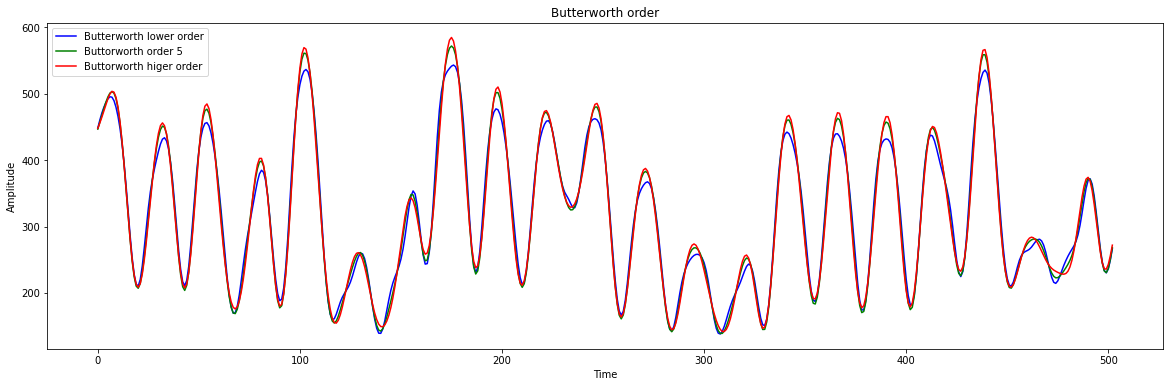

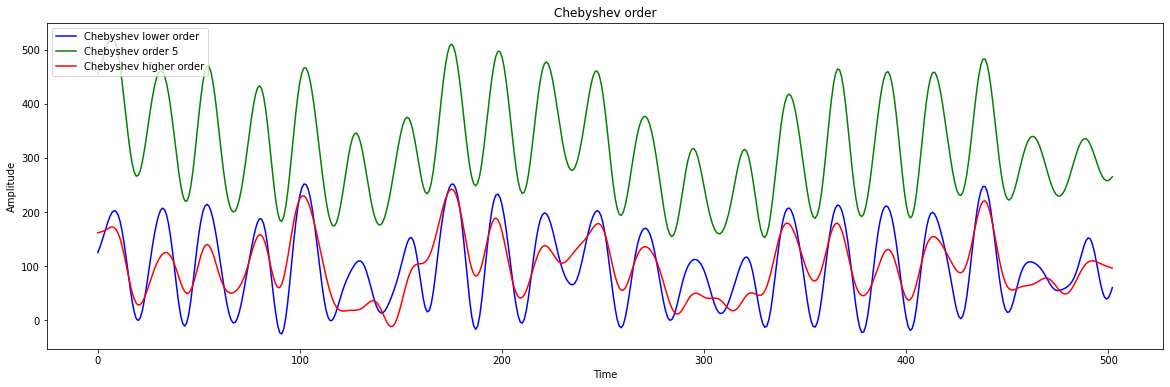

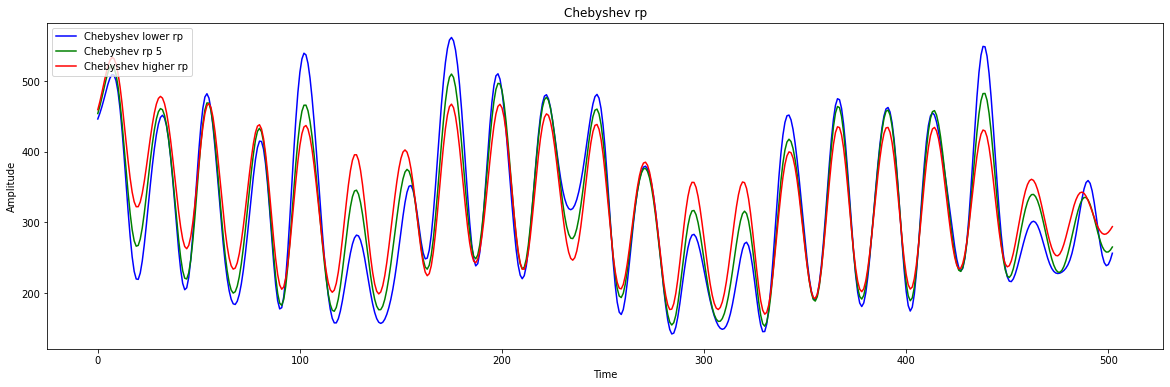

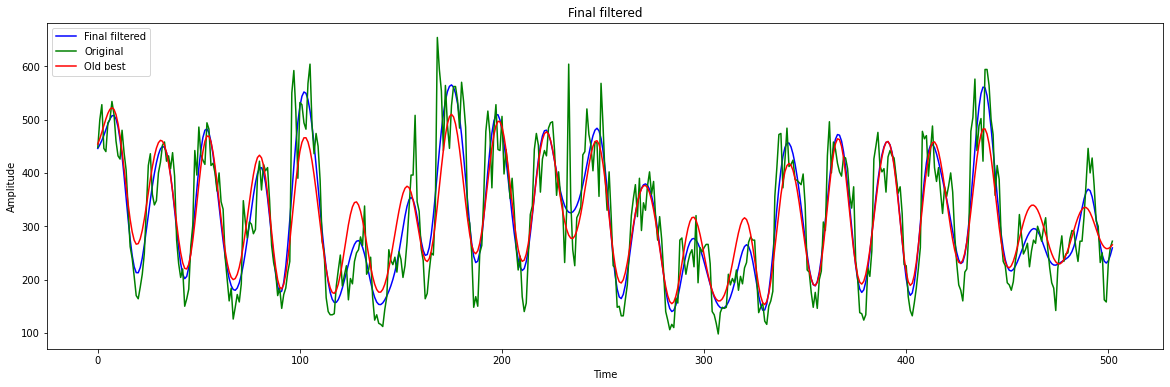

In [664]:
butter_a, butter_b = butter(2, Wn, btype='lowpass')
butter_filtered_l = filtfilt(butter_a, butter_b, data)
butter_a, butter_b = butter(10, Wn, btype='lowpass')
butter_filtered_h = filtfilt(butter_a, butter_b, data)

compare_signals([butter_filtered_l, butter_filtered, butter_filtered_h], ['Butterworth lower order', 'Buttorworth order 5', 'Buttorworth higer order'], title='Butterworth order')
# variatia amplitudinii este direct proportionala cu ordinul

cheby_a, cheby_b = cheby1(2, 5, Wn, btype='lowpass')
cheby_filtered_l = filtfilt(cheby_a, cheby_b, data)
cheby_a, cheby_b = cheby1(10, 5, Wn, btype='lowpass')
cheby_filtered_h = filtfilt(cheby_a, cheby_b, data)
# schimbarea ordinului afecteaza amplitudinea

compare_signals([cheby_filtered_l, cheby_filtered, cheby_filtered_h], ['Chebyshev lower order', 'Chebyshev order 5', 'Chebyshev higher order'], title='Chebyshev order')

cheby_a, cheby_b = cheby1(5, 1, Wn, btype='lowpass')
cheby_filtered_l = filtfilt(cheby_a, cheby_b, data)
cheby_a, cheby_b = cheby1(5, 10, Wn, btype='lowpass')
cheby_filtered_h = filtfilt(cheby_a, cheby_b, data)

compare_signals([cheby_filtered_l, cheby_filtered, cheby_filtered_h], ['Chebyshev lower rp','Chebyshev rp 5', 'Chebyshev higher rp'], title='Chebyshev rp')
# afecteaza variatia amplitudinii

final_a, final_b = cheby1(5, 0.5, Wn, btype='lowpass')
final_filtered = filtfilt(final_a, final_b, data)
compare_signals([final_filtered, data, cheby_filtered], ['Final filtered', 'Original', 'Old best'], title='Final filtered')